**Name : Dhruvi Shah**

**Student-ID : 202211032**

**Subject : AML assi2(IT585)**


Loading important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

**Q1): Let us create our own target function f and data set D and see how the perceptron learning algorithm works. Take d=2 so you can visualize the problem , and choose a random line in the plane as your target function , where one side of the line maps to +1 and the other maps to -1. Choose the inputs Xn of the data set as random points in the plane, and evaluate the target function on each Xn to get the corresponding output Yn· Now, generate a data set of size 20. Try the perceptron learning algorithm on your data set and see how long it takes to converge and how well the final hypothesis g matches your target f.**

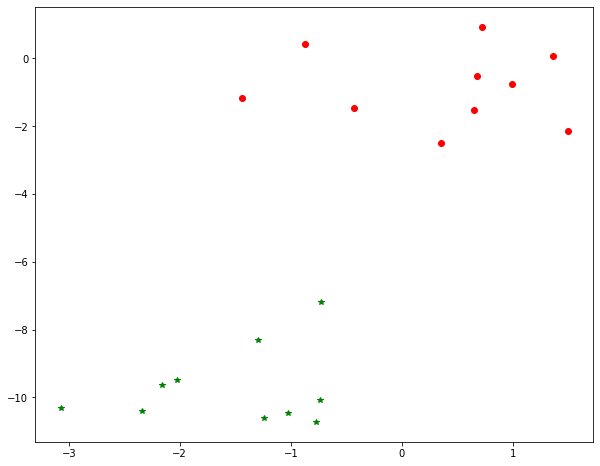

In [3]:
X, y = datasets.make_blobs(n_samples=20,n_features=2,
                           centers=2,cluster_std=1,
                           random_state=2)

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g*')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro')

In [4]:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

In [5]:
def perceptron(X, y, lr, epochs):
    
    m, n = X.shape
    theta = np.zeros((n+1,1))
    n_miss_list = []

    for epoch in range(epochs):
        n_miss = 0
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, theta))
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                n_miss += 1
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

In [6]:
def plot_decision_boundary(X, theta):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c

    fig = plt.figure(figsize=(15,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g*")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ro")
    plt.plot(x1, x2, 'k-')

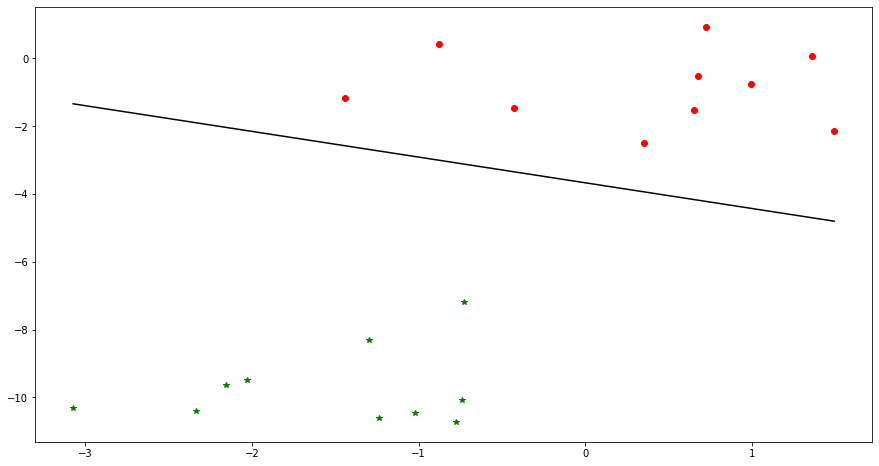

In [7]:
theta, miss_l = perceptron(X, y, 1, 1000)
plot_decision_boundary(X, theta)

In [11]:
class Perceptron:
  def generate_data(self, n_samples):
    X, y = datasets.make_blobs(n_samples=n_samples,n_features=2,
                           centers=2,cluster_std=1,
                           random_state=2)

    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g*')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro')
    return X, y

  def step_func(self, z):
    return 1.0 if (z > 0) else 0.0 

  def gradient_decent(self, X, y, lr, epochs):
    m, n = X.shape
    theta = np.zeros((n+1,1))
    n_miss_list = []
    for epoch in range(epochs):
        n_miss = 0
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, theta))
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                n_miss += 1
        n_miss_list.append(n_miss)
    return theta, n_miss_list

  def plot_decision_boundary(self, X, theta):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c

    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g*")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ro")
    plt.plot(x1, x2, 'y-')

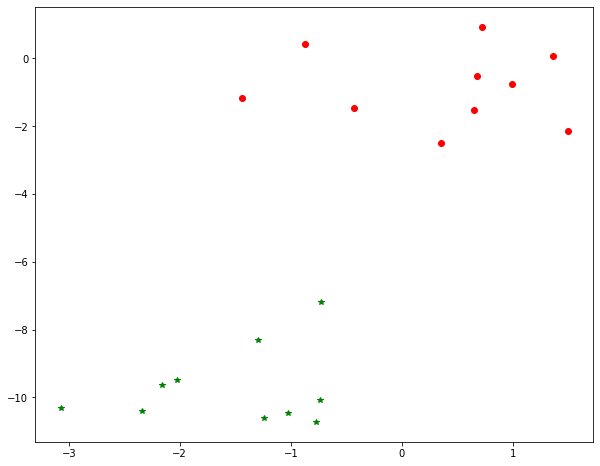

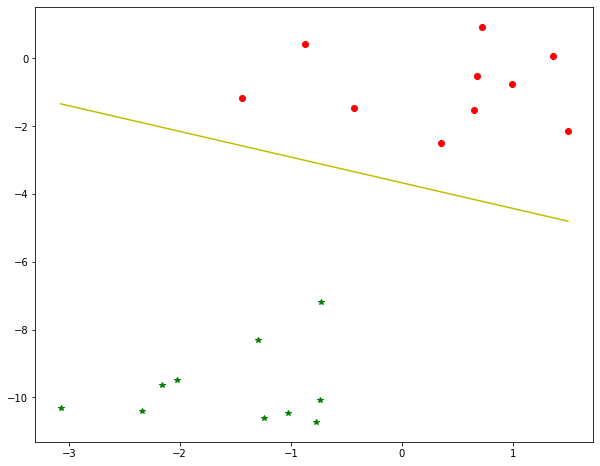

In [13]:
p = Perceptron()
X, y = p.generate_data(20)
theta, miss_l = p.gradient_decent(X, y, 0.5, 100)
p.plot_decision_boundary(X, theta)

**Q2) : Now generate 1000 random points instead of 20 and repeat the experiment. Again apply the perceptron algorithm on the dataset and report the number of iterations it takes to give final results i.e. converge.**

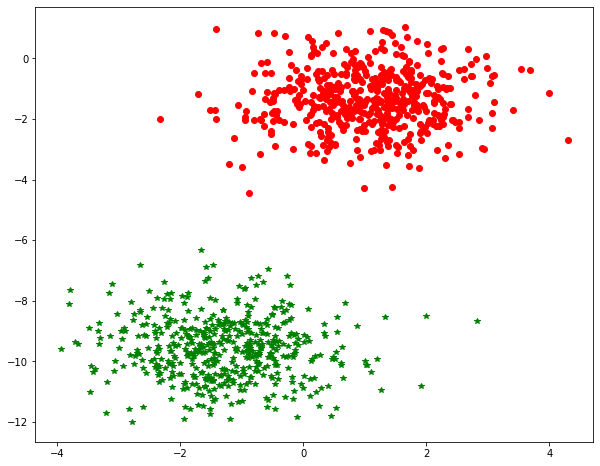

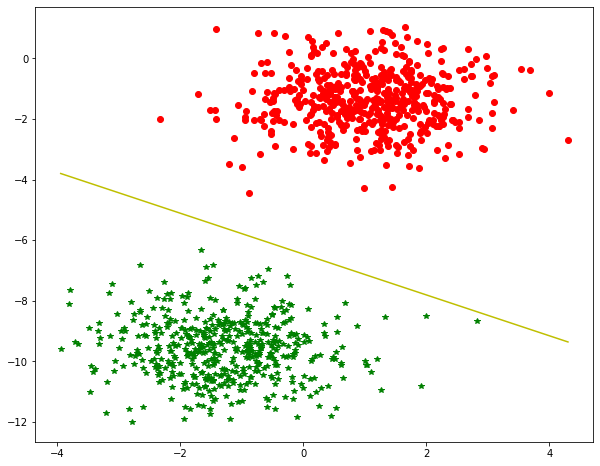

In [14]:
p = Perceptron()
X, y = p.generate_data(1000)
theta, miss_l = p.gradient_decent(X, y, 1, 50)
p.plot_decision_boundary(X, theta)

**Q3) Next take the iris data set and divide it into 80-20 train test split. Since it has 3
classes use one vs all technique to generate two hyperplanes using the PL
algorithm. Use the hyperplanes to classify the test data. Report your insights and
results.**

In [36]:
import seaborn as sns
df_iris = sns.load_dataset('iris')

In [37]:
df_iris.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_iris['target'] = le.fit_transform(df_iris['species'])

In [49]:
def plot_iris(df, feature1, feature2):
  plt.figure(figsize=(15,7))
  sns.set_style("darkgrid")
  sns.FacetGrid(df, hue="species", height=8).map(plt.scatter,feature1, feature2).add_legend()
  plt.show()

<Figure size 1080x504 with 0 Axes>

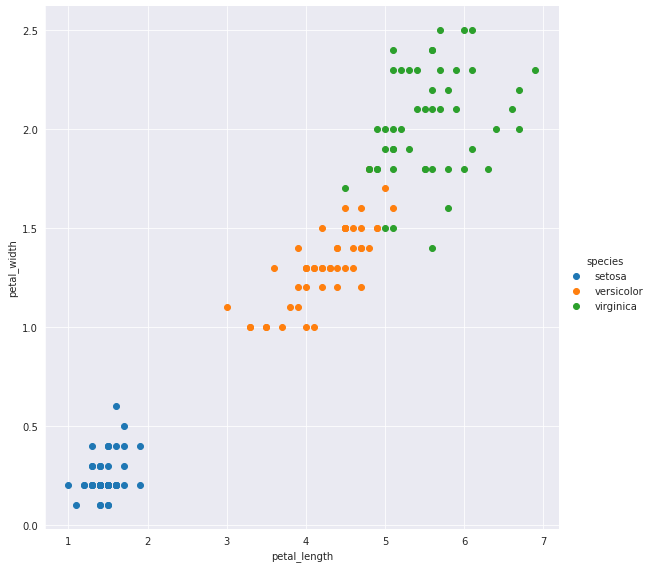

In [50]:
plot_iris(df_iris, 'petal_length', 'petal_width')

<Figure size 1080x504 with 0 Axes>

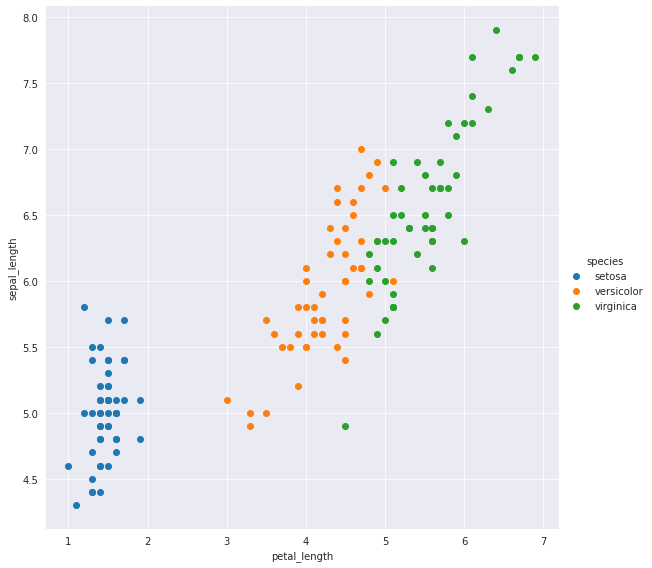

In [51]:
plot_iris(df_iris, 'petal_length', 'sepal_length')

<Figure size 1080x504 with 0 Axes>

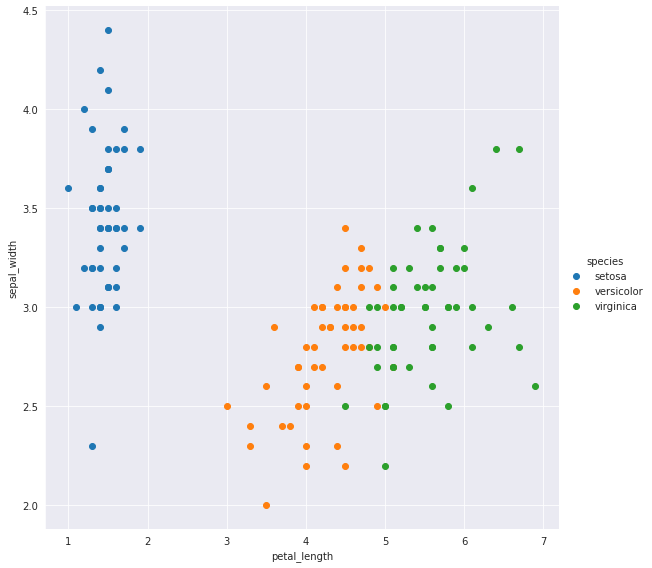

In [52]:
plot_iris(df_iris, 'petal_length', 'sepal_width')

<Figure size 1080x504 with 0 Axes>

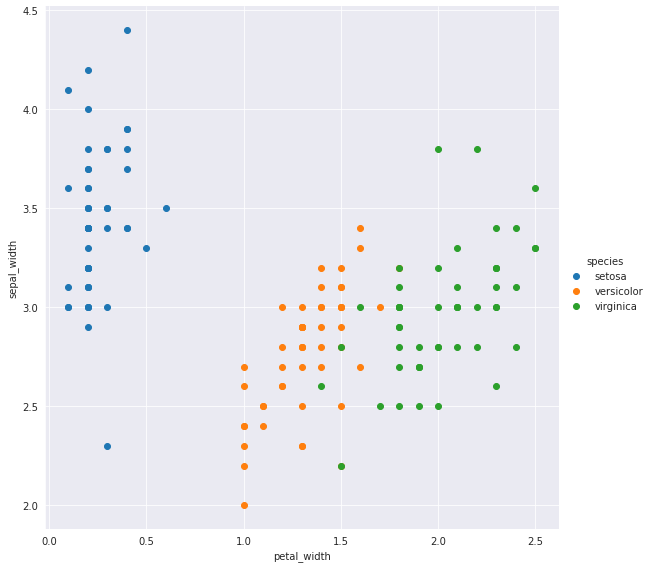

In [54]:
plot_iris(df_iris, 'petal_width', 'sepal_width')

<Figure size 1080x504 with 0 Axes>

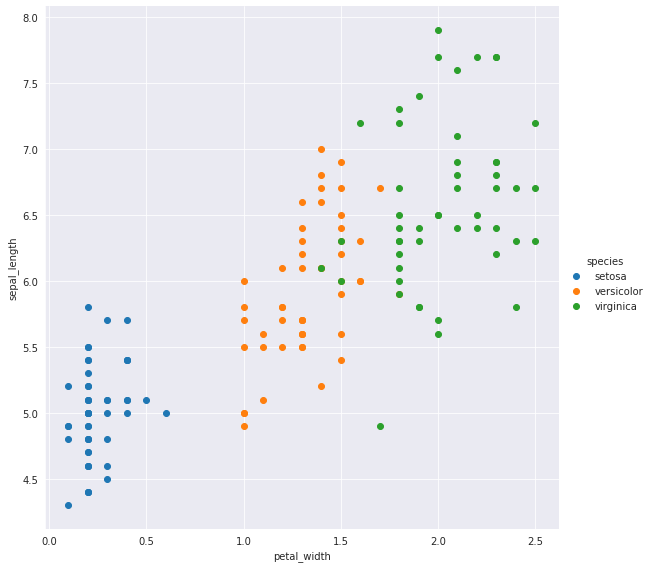

In [53]:
plot_iris(df_iris, 'petal_width', 'sepal_length')

<Figure size 1080x504 with 0 Axes>

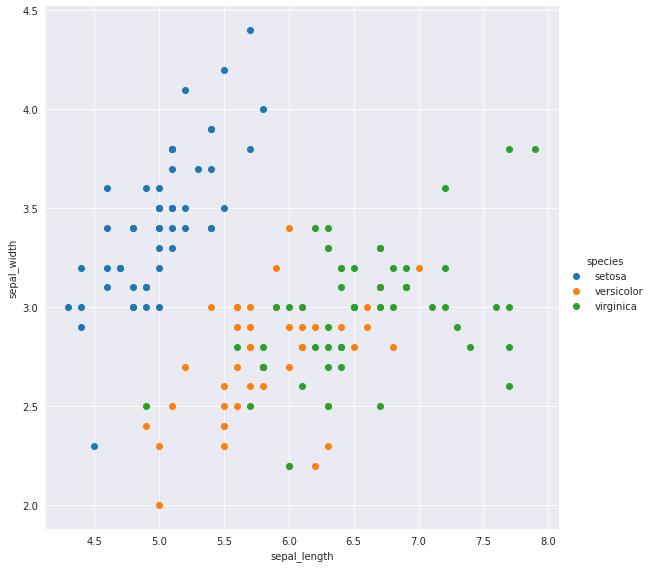

In [55]:
plot_iris(df_iris, 'sepal_length', 'sepal_width')

In [56]:
import numpy as np

class Perceptron(object):
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter

   def fit(self, X, y):
      """Fit training data
      X : Training vectors, X.shape : [#samples, #features]
      y : Target values, y.shape : [#samples]
      """

      # weights
      self.weight = np.zeros(1 + X.shape[1])

      # Number of misclassifications
      self.errors = []  # Number of misclassifications

      for i in range(self.niter):
         err = 0
         for xi, target in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            err += int(delta_w != 0.0)
         self.errors.append(err)
      return self

   def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.weight[1:]) + self.weight[0]

   def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.net_input(X) >= 0.0, 1, -1)

In [75]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.03):
   markers = ('x', '*', 'o', '^', 'v')
   colors = ('black', 'green', 'red', 'cyan', 'blue')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   #plotting decision boundary
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plotting the target samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.4, c=cmap(idx),
      marker=markers[idx], label=cl)

In [57]:
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,class,target
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
5,5.4,3.9,1.7,0.4,setosa,0,0
6,4.6,3.4,1.4,0.3,setosa,0,0
7,5.0,3.4,1.5,0.2,setosa,0,0
8,4.4,2.9,1.4,0.2,setosa,0,0
9,4.9,3.1,1.5,0.1,setosa,0,0


#petal length and petal width

In [58]:
X = df_iris[['petal_length','petal_width']].values

#target class
y = df_iris['target'].values

In [59]:
#one vs all
y = np.where(y==0, -1, 1) 

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [61]:
p = Perceptron(0.01, 50)
p.fit(x_train, y_train)

In [62]:
y_pred = p.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

1.0

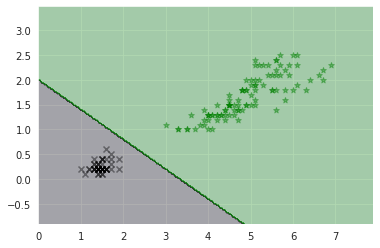

In [76]:
plot_decision_regions(X,y, classifier=p)

Experimenting with different feature input

#petal length and sepal length

In [151]:
#input features
X = df_iris[['petal_length','sepal_length']].values

#target class
y = df_iris['target'].values

In [152]:
#one vs all
y = np.where(y==0, -1, 1) 

In [153]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [154]:
p = Perceptron(0.01, 20)
p.fit(x_train, y_train)

In [155]:
y_pred = p.predict(x_test)

In [156]:
accuracy_score(y_pred, y_test)

1.0

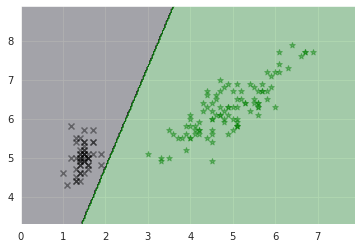

In [157]:
plot_decision_regions(X,y, classifier=p)

#Petal width and sepal width

In [144]:
#input features
X = df_iris[['petal_width','sepal_width']].values

#target class
y = df_iris['target'].values

In [145]:
y = np.where(y==0, -1, 1) #using one vs all technique

In [146]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [147]:
p = Perceptron(0.03, 20)
p.fit(x_train, y_train)

In [148]:
y_pred = p.predict(x_test)

In [149]:
accuracy_score(y_pred, y_test)

1.0

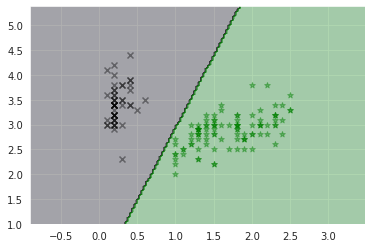

In [150]:
plot_decision_regions(X,y, classifier=p)

#Sepal Length and sepal width

In [136]:
#input features
X = df_iris[['sepal_length','sepal_width']].values

#target class
y = df_iris['target'].values

In [137]:
y = np.where(y==0, -1, 1) #using one vs all technique

In [138]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [140]:
p = Perceptron(0.05, 30)
p.fit(x_train, y_train)

In [141]:
y_pred = p.predict(x_test)

In [142]:
accuracy_score(y_pred, y_test)

1.0

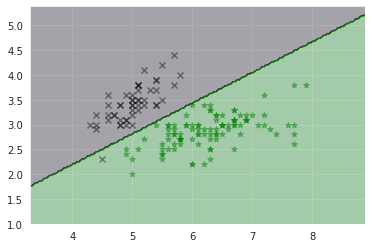

In [143]:
plot_decision_regions(X,y, classifier=p)